source: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


## first autoencoder

In [3]:
#model 1

# the size of encoded repressentations
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [4]:
# model 2 encoder

# this model maps input to its encoded representaion
encoder = Model(input_img, encoded)



In [5]:
# model 3 decoder

encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
# model 1
autoencoder.compile(optimizer='adadelta',
                    loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train.shape, x_train.shape[1:]

((60000, 28, 28), (28, 28))

In [9]:
# normalized all values to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  # (60000, 28 x 28)
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
# model 1
autoencoder.fit(x_train,
                x_train, # output is same as input
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.3714 - val_loss: 0.2727
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.2654 - val_loss: 0.2546
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.2431 - val_loss: 0.2296
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.2214 - val_loss: 0.2115
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.2064 - val_loss: 0.1991
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.1955 - val_loss: 0.1897
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.1873 - val_loss: 0.1824
Epoch 8/50
60000/60000 [==============================] - 1s - loss: 0.1806 - val_loss: 0.1763
Epoch 9/50
60000/60000 [==============================] - 1s - loss: 0.1748 - val_loss: 0.1710
Epoch 10/50
60000/60000 [==============================] - 1s - loss: 0.1697 - val_loss: 0.1660

In [11]:
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.shape)
decoded_imgs = decoder.predict(encoded_imgs)

(10000, 32)


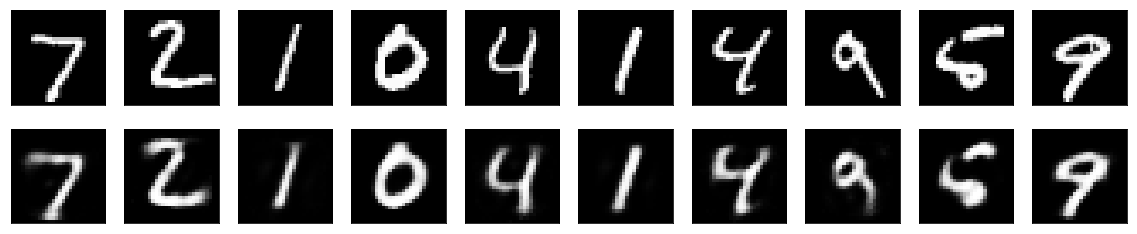

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 # number of digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Sparse Autoencoder

### implement sparse autoencoder with L1 regularization

In [13]:
from keras import regularizers

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, 
                activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [14]:
autoencoder.compile(optimizer='adadelta',
                    loss='binary_crossentropy')

In [15]:
autoencoder.fit(x_train,
                x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s - loss: 0.6835 - val_loss: 0.6606
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.6440 - val_loss: 0.6272
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.6111 - val_loss: 0.5952
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.5802 - val_loss: 0.5655
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.5519 - val_loss: 0.5386
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.5264 - val_loss: 0.5146
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.5036 - val_loss: 0.4932
Epoch 8/100
60000/60000 [==============================] - 1s - loss: 0.4835 - val_loss: 0.4744
Epoch 9/100
60000/60000 [==============================] - 1s - loss: 0.4658 - val_loss: 0.4577
Epoch 10/100
60000/60000 [==============================] - 1s - loss: 0.4501 - val_lo

60000/60000 [==============================] - 1s - loss: 0.2807 - val_loss: 0.2806
Epoch 86/100
60000/60000 [==============================] - 1s - loss: 0.2805 - val_loss: 0.2803
Epoch 87/100
60000/60000 [==============================] - 1s - loss: 0.2802 - val_loss: 0.2801
Epoch 88/100
60000/60000 [==============================] - 1s - loss: 0.2800 - val_loss: 0.2798
Epoch 89/100
60000/60000 [==============================] - 1s - loss: 0.2798 - val_loss: 0.2796
Epoch 90/100
60000/60000 [==============================] - 1s - loss: 0.2795 - val_loss: 0.2794
Epoch 91/100
60000/60000 [==============================] - 1s - loss: 0.2793 - val_loss: 0.2792
Epoch 92/100
60000/60000 [==============================] - 1s - loss: 0.2791 - val_loss: 0.2789
Epoch 93/100
60000/60000 [==============================] - 1s - loss: 0.2789 - val_loss: 0.2787
Epoch 94/100
60000/60000 [==============================] - 1s - loss: 0.2787 - val_loss: 0.2785
Epoch 95/100
60000/60000 [=================

## Deep autoencoder

In [16]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [17]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',
                    loss="binary_crossentropy")

In [18]:
autoencoder.fit(x_train,
                x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s - loss: 0.3595 - val_loss: 0.2643
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.2594 - val_loss: 0.2543
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.2471 - val_loss: 0.2403
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.2322 - val_loss: 0.2233
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.2157 - val_loss: 0.2065
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.1986 - val_loss: 0.1926
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.1883 - val_loss: 0.1825
Epoch 8/100
60000/60000 [==============================] - 1s - loss: 0.1804 - val_loss: 0.1763
Epoch 9/100
60000/60000 [==============================] - 1s - loss: 0.1736 - val_loss: 0.1722
Epoch 10/100
60000/60000 [==============================] - 1s - loss: 0.1691 - val_lo

60000/60000 [==============================] - 1s - loss: 0.1024 - val_loss: 0.1022
Epoch 86/100
60000/60000 [==============================] - 1s - loss: 0.1022 - val_loss: 0.1005
Epoch 87/100
60000/60000 [==============================] - 1s - loss: 0.1019 - val_loss: 0.1005
Epoch 88/100
60000/60000 [==============================] - 1s - loss: 0.1018 - val_loss: 0.1008
Epoch 89/100
60000/60000 [==============================] - 1s - loss: 0.1015 - val_loss: 0.1015
Epoch 90/100
60000/60000 [==============================] - 1s - loss: 0.1013 - val_loss: 0.1031
Epoch 91/100
60000/60000 [==============================] - 1s - loss: 0.1012 - val_loss: 0.1006
Epoch 92/100
60000/60000 [==============================] - 1s - loss: 0.1009 - val_loss: 0.0994
Epoch 93/100
60000/60000 [==============================] - 1s - loss: 0.1008 - val_loss: 0.0999
Epoch 94/100
60000/60000 [==============================] - 1s - loss: 0.1006 - val_loss: 0.1013
Epoch 95/100
60000/60000 [=================

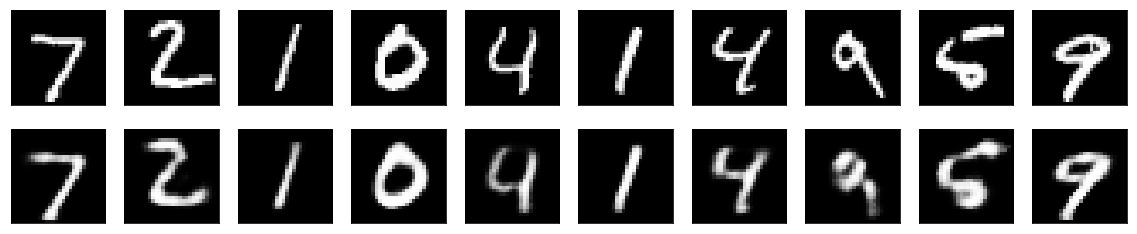

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 # number of digits we will display

y_pred = autoencoder.predict(x_test[:n,:])
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional autoencoder

In [20]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [21]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# encoded shape (4, 4, 8)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

In [22]:
autoencoder.compile(optimizer='adadelta',
                    loss='binary_crossentropy')

In [23]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [24]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train,
                x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='./tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s - loss: 0.2194 - val_loss: 0.1662
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.1562 - val_loss: 0.1479
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.1415 - val_loss: 0.1371
Epoch 4/50
60000/60000 [==============================] - 5s - loss: 0.1340 - val_loss: 0.1298
Epoch 5/50
60000/60000 [==============================] - 5s - loss: 0.1291 - val_loss: 0.1278
Epoch 6/50
60000/60000 [==============================] - 5s - loss: 0.1250 - val_loss: 0.1233
Epoch 7/50
60000/60000 [==============================] - 5s - loss: 0.1219 - val_loss: 0.1188
Epoch 8/50
60000/60000 [==============================] - 5s - loss: 0.1197 - val_loss: 0.1158
Epoch 9/50
60000/60000 [==============================] - 5s - loss: 0.1174 - val_loss: 0.1163
Epoch 10/50
60000/60000 [==============================] - 5s - loss: 0.1162 - val_loss: 0.1139

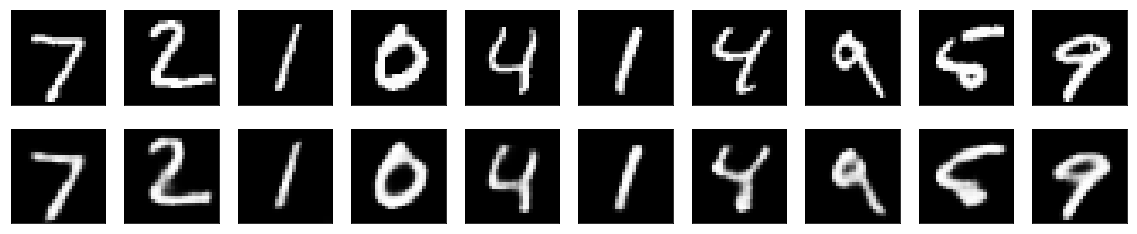

In [26]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + +1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We can also have a look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.

In [27]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)


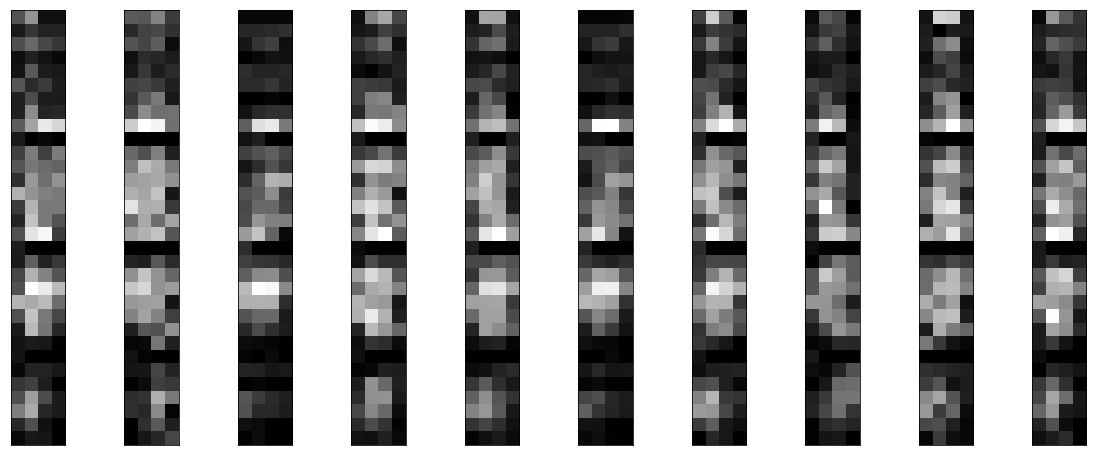

In [29]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Application to image denoising

In [30]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


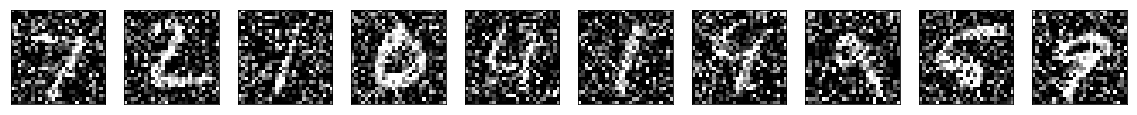

In [31]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [32]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

In [33]:
autoencoder.compile(optimizer='adadelta',
                    loss='binary_crossentropy')

In [34]:
autoencoder.fit(x_train_noisy,
                x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data = (x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s - loss: 0.2016 - val_loss: 0.1354
Epoch 2/100
60000/60000 [==============================] - 7s - loss: 0.1256 - val_loss: 0.1166
Epoch 3/100
60000/60000 [==============================] - 7s - loss: 0.1160 - val_loss: 0.1113
Epoch 4/100
60000/60000 [==============================] - 7s - loss: 0.1114 - val_loss: 0.1104
Epoch 5/100
60000/60000 [==============================] - 7s - loss: 0.1087 - val_loss: 0.1070
Epoch 6/100
60000/60000 [==============================] - 7s - loss: 0.1063 - val_loss: 0.1048
Epoch 7/100
60000/60000 [==============================] - 7s - loss: 0.1050 - val_loss: 0.1049
Epoch 8/100
60000/60000 [==============================] - 7s - loss: 0.1038 - val_loss: 0.1024
Epoch 9/100
60000/60000 [==============================] - 7s - loss: 0.1028 - val_loss: 0.1018
Epoch 10/100
60000/60000 [==============================] - 7s - loss: 0.1021 - val_lo

60000/60000 [==============================] - 7s - loss: 0.0945 - val_loss: 0.0943
Epoch 86/100
60000/60000 [==============================] - 7s - loss: 0.0945 - val_loss: 0.0950
Epoch 87/100
60000/60000 [==============================] - 7s - loss: 0.0945 - val_loss: 0.0944
Epoch 88/100
60000/60000 [==============================] - 7s - loss: 0.0944 - val_loss: 0.0945
Epoch 89/100
60000/60000 [==============================] - 7s - loss: 0.0944 - val_loss: 0.0942
Epoch 90/100
60000/60000 [==============================] - 7s - loss: 0.0944 - val_loss: 0.0945
Epoch 91/100
60000/60000 [==============================] - 7s - loss: 0.0943 - val_loss: 0.0940
Epoch 92/100
60000/60000 [==============================] - 7s - loss: 0.0943 - val_loss: 0.0940
Epoch 93/100
60000/60000 [==============================] - 7s - loss: 0.0943 - val_loss: 0.0939
Epoch 94/100
60000/60000 [==============================] - 7s - loss: 0.0943 - val_loss: 0.0939
Epoch 95/100
60000/60000 [=================

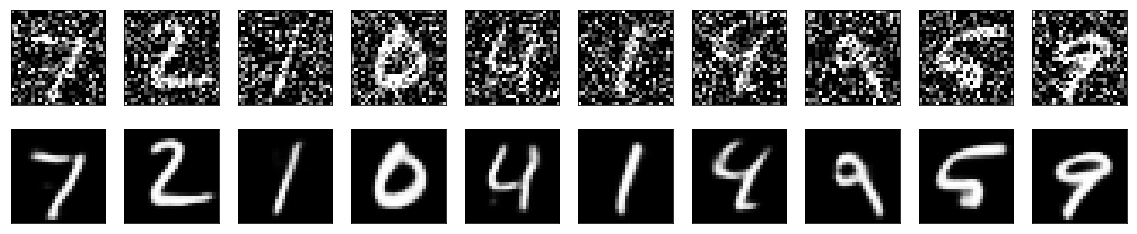

In [36]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + +1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Seq2Seq Autoencoder

In [ ]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)